In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style('whitegrid')
%matplotlib inline

import pandas_datareader.data as pdweb

from datetime import datetime

* Basic Analysis of Stock Information:

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
tech_stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_stock_list

['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [3]:
end = datetime.now() #end date
end

datetime.datetime(2020, 2, 7, 18, 2, 30, 616780)

In [4]:
start = datetime(end.year - 1, end.month, end.day) #start date
start

datetime.datetime(2019, 2, 7, 0, 0)

In [0]:
for stock in tech_stock_list: #to grab some stock prizes
    globals()[stock] = pdweb.DataReader(stock, 'yahoo', start, end)

In [6]:
AAPL.head() #stock prizes for Apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-07,173.940002,170.339996,172.399994,170.940002,31741700.0,168.409653
2019-02-08,170.660004,168.419998,168.990005,170.410004,23820000.0,168.607529
2019-02-11,171.210007,169.250000,171.050003,169.429993,20993400.0,167.637878
2019-02-12,171.000000,169.699997,170.100006,170.889999,22283500.0,169.082443
2019-02-13,172.479996,169.919998,171.389999,170.179993,22490200.0,168.379944


In [7]:
GOOG.head() #stock prizes for Google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-07,1104.839966,1086.000000,1104.160034,1098.709961,2044800,1098.709961
2019-02-08,1098.910034,1086.550049,1087.000000,1095.060059,1075800,1095.060059
2019-02-11,1105.944946,1092.859985,1096.949951,1095.010010,1065200,1095.010010
2019-02-12,1125.295044,1105.849976,1106.800049,1121.369995,1609100,1121.369995
2019-02-13,1134.729980,1118.500000,1124.989990,1120.160034,1049800,1120.160034


In [8]:
MSFT.head() #stock prizes for Microsoft

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-07,105.589996,104.290001,105.190002,105.269997,29760700.0,103.736145
2019-02-08,105.779999,104.260002,104.389999,105.669998,21461100.0,104.130325
2019-02-11,106.580002,104.970001,106.199997,105.250000,18914100.0,103.716446
2019-02-12,107.139999,105.480003,106.139999,106.889999,25056600.0,105.332550
2019-02-13,107.779999,106.709999,107.500000,106.809998,18394900.0,105.253716


In [9]:
AMZN.head() #stock prizes for Amazon

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-07,1625.540039,1592.910034,1625.00000,1614.369995,4626600,1614.369995
2019-02-08,1588.589966,1566.760010,1586.00000,1588.219971,5657500,1588.219971
2019-02-11,1609.290039,1586.000000,1600.97998,1591.000000,3317300,1591.000000
2019-02-12,1639.400024,1598.880005,1604.00000,1638.010010,4858600,1638.010010
2019-02-13,1656.380005,1637.109985,1647.00000,1640.000000,3560300,1640.000000


Basic analysis on AAPL DataFrame:

In [10]:
AAPL.describe() #to get mathematical description on the Dataframe

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,225.800473,222.024111,223.707549,224.125494,2.762636e+07,223.120536
std,42.676856,42.094962,42.322877,42.590784,9.770482e+06,43.218260
min,170.660004,168.419998,168.990005,169.429993,1.136200e+07,167.637878
25%,196.789993,193.149994,194.860001,195.089996,2.092930e+07,193.283737
50%,209.149994,206.660004,207.669998,207.740005,2.588170e+07,206.274857
75%,258.190002,256.290009,257.329987,257.500000,3.201060e+07,256.729218
max,327.850006,321.380005,324.450012,325.209991,6.928140e+07,325.209991


In [11]:
AAPL.info() #basic info on the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-02-07 to 2020-02-07
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

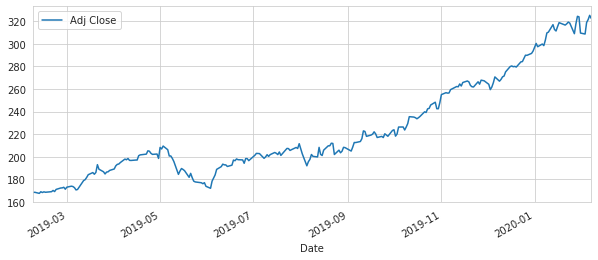

In [12]:
AAPL['Adj Close'].plot(legend = True, figsize = (10, 4))

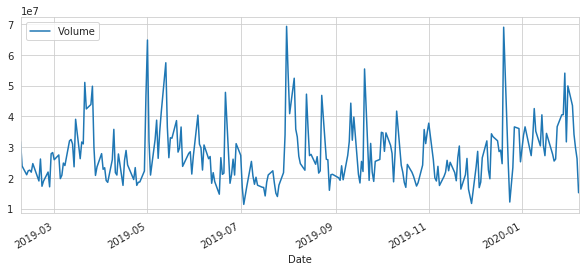

In [13]:
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [0]:
ma_day = [10, 20, 50]
#10, 20, 30 days moving average

for ma in ma_day:
    column_name = f'ma for {ma} days'
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma).mean()

In [15]:
AAPL.head(50)

,High,Low,Open,Close,Volume,Adj Close,ma for 10 days,ma for 20 days,ma for 50 days
Date,,,,,,,,,
2019-02-07,173.940002,170.339996,172.399994,170.940002,31741700.0,168.409653,NaN,NaN,NaN
2019-02-08,170.660004,168.419998,168.990005,170.410004,23820000.0,168.607529,NaN,NaN,NaN
2019-02-11,171.210007,169.250000,171.050003,169.429993,20993400.0,167.637878,NaN,NaN,NaN
2019-02-12,171.000000,169.699997,170.100006,170.889999,22283500.0,169.082443,NaN,NaN,NaN
2019-02-13,172.479996,169.919998,171.389999,170.179993,22490200.0,168.379944,NaN,NaN,NaN
2019-02-14,171.259995,169.380005,169.710007,170.800003,21835700.0,168.993408,NaN,NaN,NaN
2019-02-15,171.699997,169.750000,171.250000,170.419998,24626800.0,168.617432,NaN,NaN,NaN
2019-02-19,171.440002,169.490005,169.710007,170.929993,18972800.0,169.122009,NaN,NaN,NaN
2019-02-20,173.320007,170.990005,171.190002,172.029999,26114400.0,170.210388,NaN,NaN,NaN


Plot for all the Moving Averages


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f07347c3e80>,
      dtype=object)

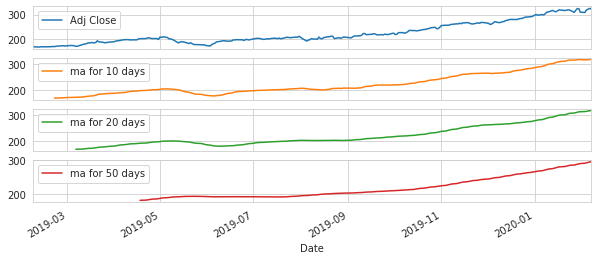

In [16]:
AAPL[['Adj Close', 'ma for 10 days', 'ma for 20 days', 'ma for 50 days']].plot(subplots = True, figsize = (10, 4))

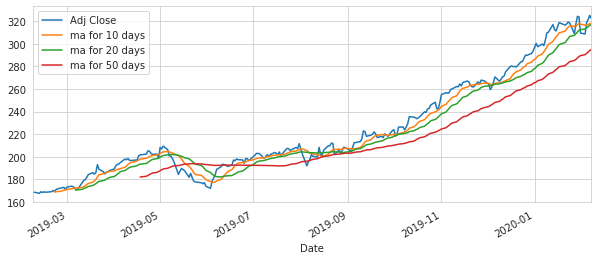

In [17]:
AAPL[['Adj Close', 'ma for 10 days', 'ma for 20 days', 'ma for 50 days']].plot(subplots = False, figsize = (10, 4))

#### Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,ma for 10 days,ma for 20 days,ma for 50 days,Daily Return
Date,,,,,,,,,,
2019-02-07,173.940002,170.339996,172.399994,170.940002,31741700.0,168.409653,NaN,NaN,NaN,NaN
2019-02-08,170.660004,168.419998,168.990005,170.410004,23820000.0,168.607529,NaN,NaN,NaN,0.001175
2019-02-11,171.210007,169.250000,171.050003,169.429993,20993400.0,167.637878,NaN,NaN,NaN,-0.005751
2019-02-12,171.000000,169.699997,170.100006,170.889999,22283500.0,169.082443,NaN,NaN,NaN,0.008617
2019-02-13,172.479996,169.919998,171.389999,170.179993,22490200.0,168.379944,NaN,NaN,NaN,-0.004155


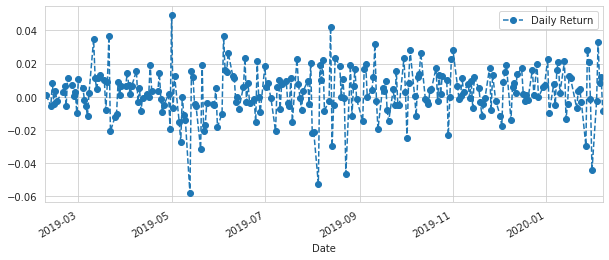

In [19]:
AAPL['Daily Return'].plot(legend = True, linestyle = '--', marker = 'o', figsize = (10, 4))

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

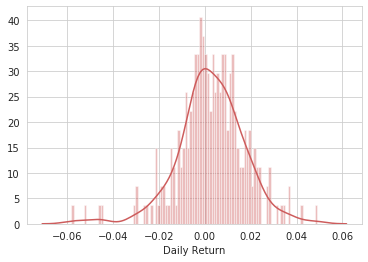

In [20]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'indianred')

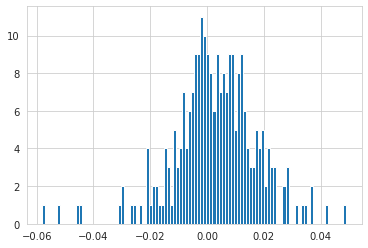

In [21]:
AAPL['Daily Return'].hist(bins = 100)

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Adj Close'] columns for each of the stocks dataframes.

In [22]:
closing_df = pdweb.DataReader(tech_stock_list ,'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-07,168.409653,1098.709961,103.736145,1614.369995
2019-02-08,168.607529,1095.060059,104.130325,1588.219971
2019-02-11,167.637878,1095.010010,103.716446,1591.000000
2019-02-12,169.082443,1121.369995,105.332550,1638.010010
2019-02-13,168.379944,1120.160034,105.253716,1640.000000


In [23]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-07,NaN,NaN,NaN,NaN
2019-02-08,0.001175,-0.003322,0.003800,-0.016198
2019-02-11,-0.005751,-0.000046,-0.003975,0.001750
2019-02-12,0.008617,0.024073,0.015582,0.029547
2019-02-13,-0.004155,-0.001079,-0.000748,0.001215


Now we can compare the daily percentage return of two stocks to check how they correlate. First let's see a stock compared to itself.

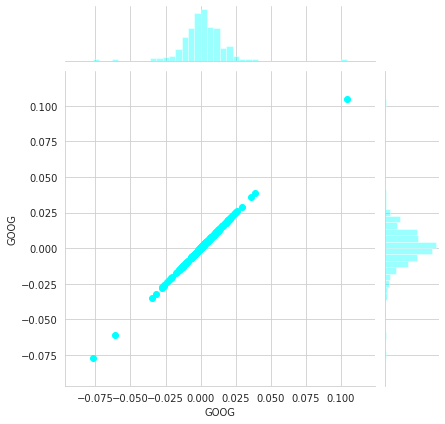

In [24]:
# Comparing Google to itself should give a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'cyan')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


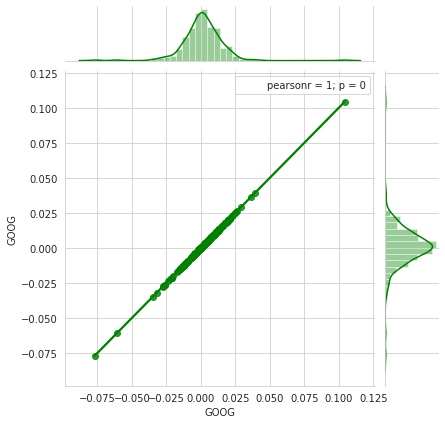

In [25]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'reg', color = 'green').annotate(stats.pearsonr)

So now we can see that if two stocks are perfectly (and positively) correlated with each other a linear relationship between its daily return values should occur. So let's go ahead and compare Microsoft and Amazon the same way.

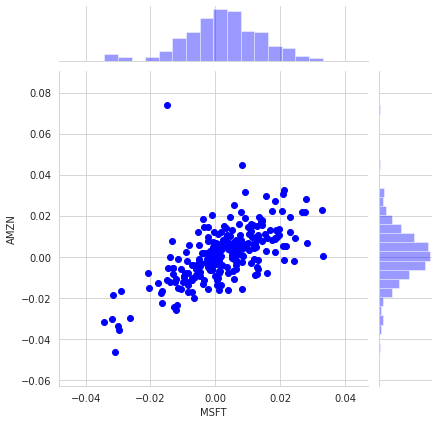

In [26]:
sns.jointplot('MSFT', 'AMZN', tech_rets, kind = 'scatter', color = 'blue')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


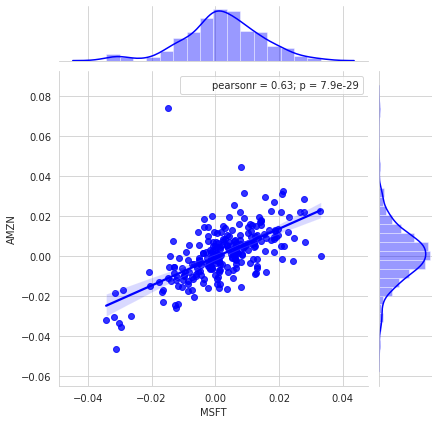

In [27]:
sns.jointplot('MSFT', 'AMZN', tech_rets, kind = 'reg', color = 'blue').annotate(stats.pearsonr)

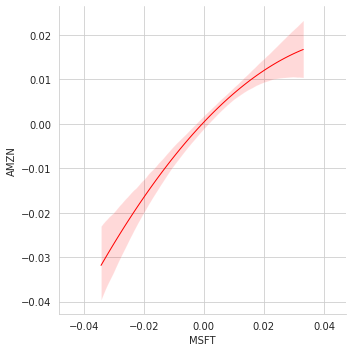

In [28]:
sns.lmplot('MSFT', 'AMZN', tech_rets, order = 2, scatter = False,
          line_kws = {'color' : 'red', 'linewidth' : 1})

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

Different types of p values:

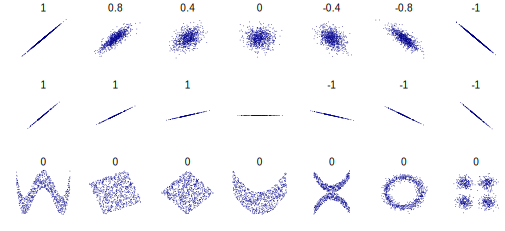

In [29]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

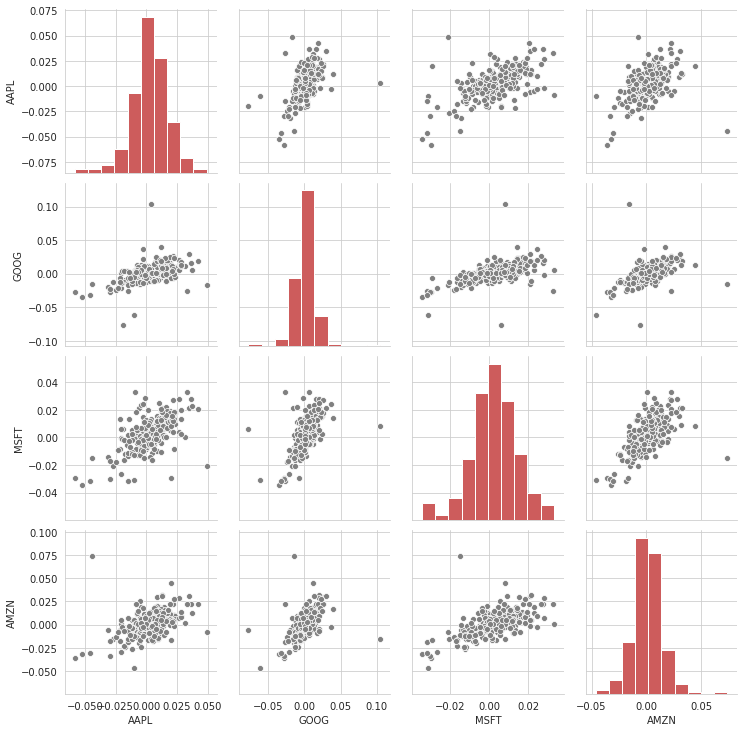

In [30]:
sns.pairplot(tech_rets, dropna = True, kind = 'scatter',
            diag_kws = {'color' : 'indianred'}, plot_kws = {'color' : 'grey'})

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Microsoft and Amazon daily returns. It might be interesting to investigate that individual comparison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

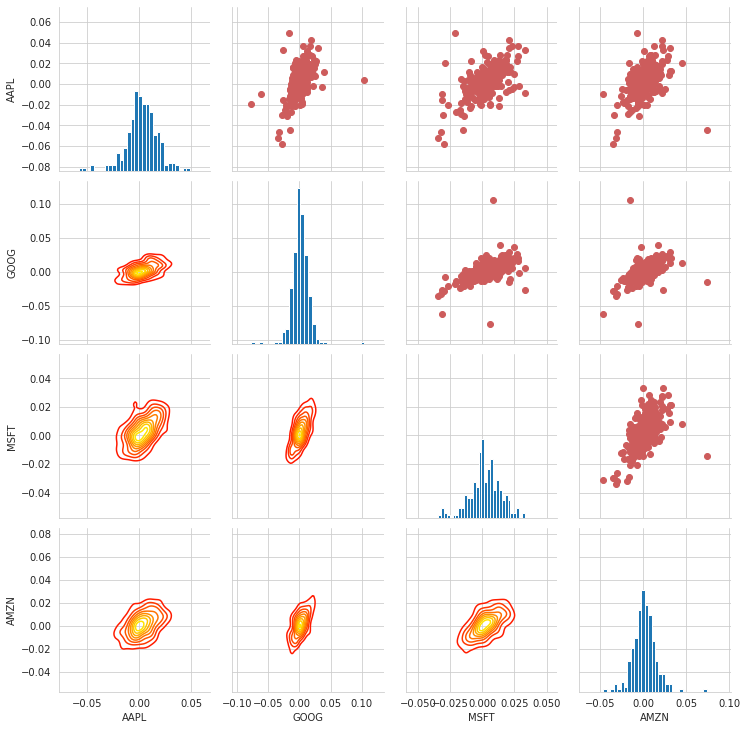

In [31]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'indianred')
returns_fig.map_lower(sns.kdeplot, cmap = 'autumn')
returns_fig.map_diag(plt.hist, bins = 30)

We could have also analyzed the correlation of the closing prices using this exact same technique.

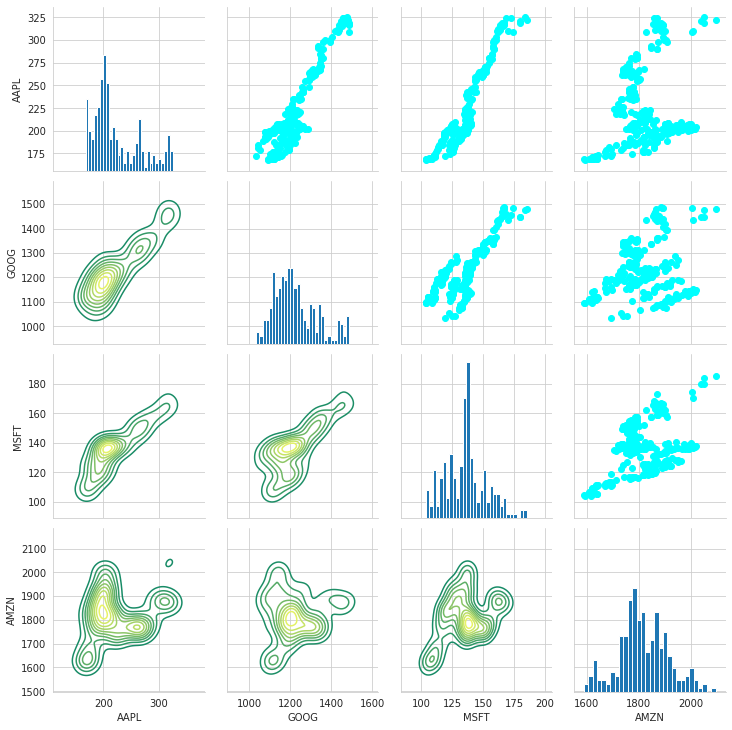

In [32]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'cyan')
returns_fig.map_lower(sns.kdeplot, cmap = 'summer')
returns_fig.map_diag(plt.hist, bins = 30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

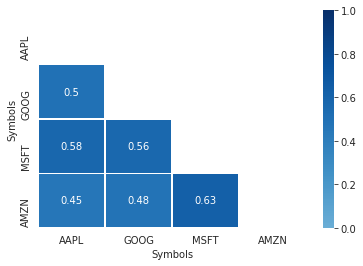

In [33]:
mask = np.zeros_like(tech_rets.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(tech_rets.dropna().corr(), mask = mask, cmap = 'Blues', vmin = 0, vmax = 1, center = 0,
            linewidths = .5, annot = True)

In [34]:
tech_rets.dropna().corr()

Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1.000000,0.496315,0.576424,0.454262
GOOG,0.496315,1.000000,0.564603,0.480047
MSFT,0.576424,0.564603,1.000000,0.626066
AMZN,0.454262,0.480047,0.626066,1.000000


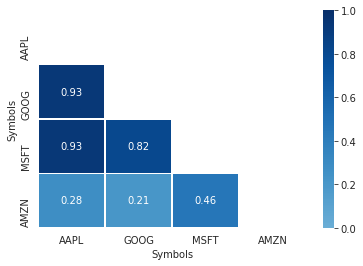

In [35]:
sns.heatmap(closing_df.dropna().corr(), mask = mask, cmap = 'Blues', vmin = 0, vmax = 1, center = 0,
            linewidths = .5, annot = True)

In [36]:
closing_df.dropna().corr()

Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1.000000,0.934905,0.933754,0.277176
GOOG,0.934905,1.000000,0.815087,0.213401
MSFT,0.933754,0.815087,1.000000,0.457161
AMZN,0.277176,0.213401,0.457161,1.000000


Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Microsoft had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.

#### Risk Analysis

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [37]:
rets = tech_rets.dropna()
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-08,0.001175,-0.003322,0.003800,-0.016198
2019-02-11,-0.005751,-0.000046,-0.003975,0.001750
2019-02-12,0.008617,0.024073,0.015582,0.029547
2019-02-13,-0.004155,-0.001079,-0.000748,0.001215
2019-02-14,0.003643,0.001348,0.000843,-0.010579


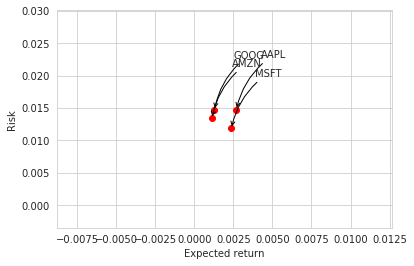

In [38]:
plt.scatter(rets.mean(), rets.std(), color = 'red')

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.2', color = 'black'))
#x = mean of respective column, y = std of respective column, label is the name of the column

#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. There are several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

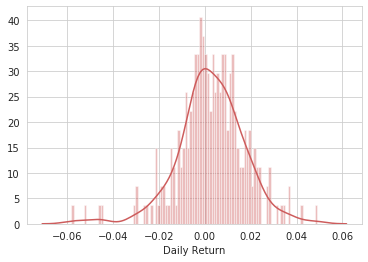

In [39]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'indianred')

In [40]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-08,0.001175,-0.003322,0.003800,-0.016198
2019-02-11,-0.005751,-0.000046,-0.003975,0.001750
2019-02-12,0.008617,0.024073,0.015582,0.029547
2019-02-13,-0.004155,-0.001079,-0.000748,0.001215
2019-02-14,0.003643,0.001348,0.000843,-0.010579


In [41]:
rets['AAPL'].quantile(0.05)

-0.020656430977620002

The 0.05 empirical quantile of daily returns is at -0.03314. That means that with 95% confidence, our worst daily loss will not exceed 3.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.03314 * 1,000,000 = $33,140.

Similarly, for other companies:

*Microsoft*

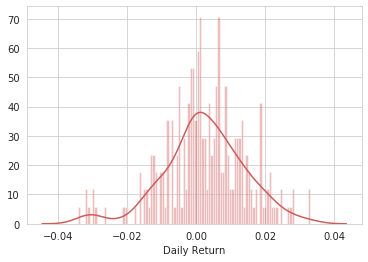

In [42]:
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
sns.distplot(MSFT['Daily Return'].dropna(), bins = 100, color = 'indianred')

In [43]:
rets['MSFT'].quantile(0.05)

-0.016312458627047204

*Google*

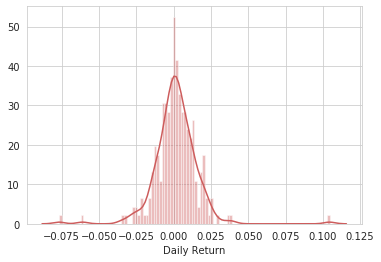

In [44]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
sns.distplot(GOOG['Daily Return'].dropna(), bins = 100, color = 'indianred')

In [45]:
rets['GOOG'].quantile(0.05)

-0.018519650807258658

*Amazon*

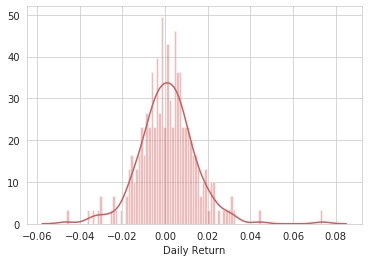

In [46]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
sns.distplot(AMZN['Daily Return'].dropna(), bins = 100, color = 'indianred')

In [47]:
rets['AMZN'].quantile(0.05)

-0.0175593030862788

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the *Geometric Brownian Motion* (GBM), which is technically known as a *Markov process*. This means that the stock price follows a *random walk* and is consistent with (at the very least) the weak form of the *Efficient Market Hypothesis* (EMH) : past price information is already incorporated and the next price movement is *"conditionally independent"* of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for Geometric Browninan Motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the *stock price*, mu is the *expected return* (which we calculated earlier[Daily Return]),sigma is the *standard deviation* of the returns, t is *time*, and epsilon is the *random variable*.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as *drift* , which is the average daily return multiplied by the change of time. The second term is known as *shock*, for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Amazon DataFrame AMZN

In [0]:
days = 365
dt = 1/days

mu = rets.mean()['AMZN']

sigma = rets.std()['AMZN']

In [0]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
        
    return price

In [50]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-02-07,1625.540039,1592.910034,1625.00000,1614.369995,4626600,1614.369995,NaN
2019-02-08,1588.589966,1566.760010,1586.00000,1588.219971,5657500,1588.219971,-0.016198
2019-02-11,1609.290039,1586.000000,1600.97998,1591.000000,3317300,1591.000000,0.001750
2019-02-12,1639.400024,1598.880005,1604.00000,1638.010010,4858600,1638.010010,0.029547
2019-02-13,1656.380005,1637.109985,1647.00000,1640.000000,3560300,1640.000000,0.001215


Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

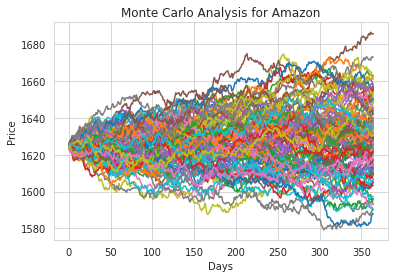

In [51]:
start_price = AMZN['Open'][0] #get start price from GOOG

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Amazon')

In [0]:
runs = 100000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]

In [53]:
simulations

array([1612.8234044 , 1648.13551578, 1627.62514605, ..., 1634.52913397,
       1651.94943801, 1623.13168643])

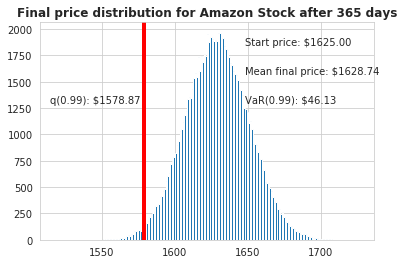

In [54]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Amazon Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Amazon stock, which looks to be $46.13 for every investment of 1628.74 (the price of one inital Amazon stock).

This basically means for every initial stock you purchase your putting about $46.13 at risk 99% of the time from our Monte Carlo Simulation.